<a>https://www.kaggle.com/datasets/umerkk12/online-retail-business</a>

<H1><b>About Dataset</b></H1>
<p>This is a dataset for online orders placed at a retail business. The rows represent the transactions of every order being made. Our job is to find out how we can dive deep into this data set to bring out meaning for the retail business to make strategic business decisions.</p>

<H2><b>Columns</H2></b>

<p><i>C = Categorical</i></p>

<p><i>N = Numerical</i></p>

<p><i>D = Date</i></p>

<p>(N) Invoice No: The unique number assigned to this particular row/transaction</p>
<p>(C) StockCode: The code of the item purchased</p>
<p>(C) Description: The description of the item purchased</p>
<p>(N) Quantity: The quantity of the item purchased</p>
<p>(D) InvoiceDate: The Date on which the item was purchased</p>
<p>(N) UnitPrice: The price at which the item was purchased</p>
<p>(C) CustomerID: The ID of the customer which has made this transaction</p>
<p>(C) Country: The country in which this transactio took place</p>


---
# <H2><b>Preparing my dataframe</H2></b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import auth
import gspread
from google.auth import default

#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

#defining my worksheet
worksheet = gc.open('OnlineRetail').sheet1

#get_all_values gives a list of rows
rows = worksheet.get_all_values()

#Convert to a DataFrame 
df = pd.DataFrame(rows)

#creating columns name
df.columns = df.iloc[0]
df = df.iloc[1:]

# <H2><b>Analising my dataframe</H2></b>

In [3]:
df_row = df

In [4]:
# When I need to reset the dataframe
# df = df_row

In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 1 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    541909 non-null  object
 1   StockCode    541909 non-null  object
 2   Description  541909 non-null  object
 3   Quantity     541909 non-null  object
 4   InvoiceDate  541909 non-null  object
 5   UnitPrice    541909 non-null  object
 6   CustomerID   541909 non-null  object
 7   Country      541909 non-null  object
dtypes: object(8)
memory usage: 33.1+ MB


In [7]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541905,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680,France
541906,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.1,12680,France
541907,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680,France
541908,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680,France
541909,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680,France


In [8]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object', name=0)

In [9]:
df.nunique()

0
InvoiceNo      25900
StockCode       4070
Description     4212
Quantity         722
InvoiceDate    23260
UnitPrice       1629
CustomerID      4373
Country           38
dtype: int64

In [10]:
df = df.astype({'InvoiceNo':'object', 
        'StockCode':'object', 
        'Description':'object', 
        'Quantity':'int64',
        'InvoiceDate':'object', 
        'UnitPrice':'float64', 
        'CustomerID':'object', 
        'Country':'object'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 1 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [11]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541905,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680,France
541906,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680,France
541907,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680,France
541908,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680,France
541909,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680,France


In [12]:
df_InvoiceDate = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

df['InvoiceDate_year'] = pd.DatetimeIndex(df_InvoiceDate).year
df['InvoiceDate_month'] = pd.DatetimeIndex(df_InvoiceDate).month
df['InvoiceDate_weekday'] = pd.DatetimeIndex(df_InvoiceDate).weekday
df['InvoiceDate_hour'] = pd.DatetimeIndex(df_InvoiceDate).hour

In [13]:
df.isin(['-', '?', '']).sum()

0
InvoiceNo                   0
StockCode                   0
Description              1501
Quantity                    0
InvoiceDate                 0
UnitPrice                   0
CustomerID             135080
Country                     0
InvoiceDate_year            0
InvoiceDate_month           0
InvoiceDate_weekday         0
InvoiceDate_hour            0
dtype: int64

In [14]:
# df[(df['CustomerID']=='')]['CustomerID'] = None
df.loc[(df['CustomerID']=='') | (df['CustomerID']=='-') | (df['CustomerID']=='?'),'CustomerID'] = 'Anonymous'

In [15]:
df.loc[(df['Description']=='') | (df['Description']=='-') | (df['Description']=='?'),'Description'] = None

In [16]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])

missing_data(df)

,Total,Percentage
0,,
Description,1501,0.276984
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,0,0.000000
Country,0,0.000000
InvoiceDate_year,0,0.000000


In [17]:
df[df['UnitPrice']==0]['UnitPrice'].count()

2515

In [18]:
df[df['UnitPrice']<0]['UnitPrice'].count()

2

In [19]:
df[df['Quantity']==0]['Quantity'].count()

0

In [20]:
df[df['Quantity']<0]['Quantity'].count()

10624

In [21]:
df.duplicated().sum()

5268

In [22]:
df.nunique().sort_values(ascending=False)

0
InvoiceNo              25900
InvoiceDate            23260
CustomerID              4373
Description             4210
StockCode               4070
UnitPrice               1629
Quantity                 722
Country                   38
InvoiceDate_hour          15
InvoiceDate_month         12
InvoiceDate_weekday        6
InvoiceDate_year           2
dtype: int64

In [23]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

<H3><b>Observations:</b><H3>

<p>1. We have 5268 duplicated data to drop because that amount is not significant for the total.</p>
<p>2. 'InvoiceNo' and 'Description' columns have not given us important informarmation. If we would have had the products as categories, that could give us more information.</p>
<p>3. 'UnitPrice' == 0 we can interpret that these buys were cancelled. Meanwhile, 'UnitPrice' < 0 the products were returned and money were refunded.</p>
<p>4. The description with '?' could be a issue when the buyers cancelled some purchases.</p>
<p>5. 'Quantity' < 0 were products who the buyer returned.</p>
<p>6. I think hours do not give us a lot of information rather than we talk about 'morning', 'afternoon', etc.</p>


In [24]:
df.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [25]:
df.drop(['InvoiceNo', 'Description'], axis=1, inplace=True)

In [26]:
def cancelledPurchase(price):
    if price == 0:
        return 'cancelled'
    elif price < 0:
        return 'cancelled_and_refund'
    else:
        return 'done'

df['Status_Purchase'] = df['UnitPrice'].apply(lambda x: cancelledPurchase(x))

In [27]:
def returnPurchase(q):
    if q < 0:
        return 'returned'
    else:
        return 'done'

df['Status_Returns'] = df['Quantity'].apply(lambda x: returnPurchase(x))

In [28]:
def dayTimePurchase(time):
    if 7 < time < 12:
        return 'morning'
    elif 12 <= time < 15:
        return 'lunch_time'
    elif 15 <= time < 18:
        return 'afternoon'
    elif 18 <= time < 22:
        return 'evening'
    else:
        return 'night'

df['InvoiceDate_daytime'] = df['InvoiceDate_hour'].apply(lambda x: dayTimePurchase(x))

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   StockCode            536641 non-null  object 
 1   Quantity             536641 non-null  int64  
 2   InvoiceDate          536641 non-null  object 
 3   UnitPrice            536641 non-null  float64
 4   CustomerID           536641 non-null  object 
 5   Country              536641 non-null  object 
 6   InvoiceDate_year     536641 non-null  int64  
 7   InvoiceDate_month    536641 non-null  int64  
 8   InvoiceDate_weekday  536641 non-null  int64  
 9   InvoiceDate_hour     536641 non-null  int64  
 10  Status_Purchase      536641 non-null  object 
 11  Status_Returns       536641 non-null  object 
 12  InvoiceDate_daytime  536641 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 53.2+ MB


In [30]:
df.head()

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_weekday,InvoiceDate_hour,Status_Purchase,Status_Returns,InvoiceDate_daytime
0,85123A,6,01-12-2010 8:26,2.55,17850,United Kingdom,2010,12,2,8,done,done,morning
1,71053,6,01-12-2010 8:26,3.39,17850,United Kingdom,2010,12,2,8,done,done,morning
2,84406B,8,01-12-2010 8:26,2.75,17850,United Kingdom,2010,12,2,8,done,done,morning
3,84029G,6,01-12-2010 8:26,3.39,17850,United Kingdom,2010,12,2,8,done,done,morning
4,84029E,6,01-12-2010 8:26,3.39,17850,United Kingdom,2010,12,2,8,done,done,morning


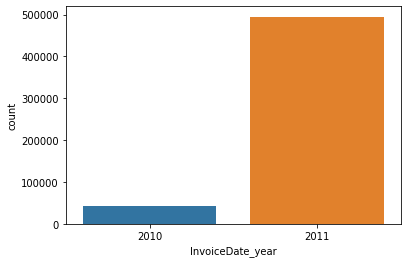

In [31]:
sns.countplot(x='InvoiceDate_year', data=df)

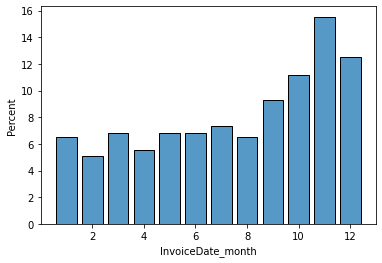

In [32]:
sns.histplot(x='InvoiceDate_month', data=df, stat="percent", discrete=True, shrink=.8) 

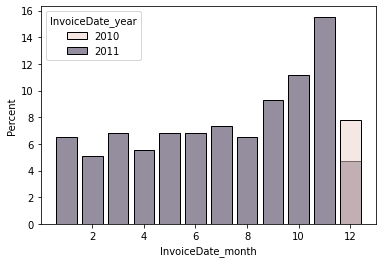

In [33]:
sns.histplot(x='InvoiceDate_month', data=df, stat="percent", discrete=True, shrink=.8, hue='InvoiceDate_year')

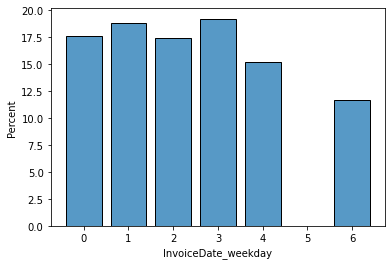

In [34]:
sns.histplot(x='InvoiceDate_weekday', data=df, stat="percent", discrete=True, shrink=.8)
# The day of the week with Monday=0, Sunday=6.

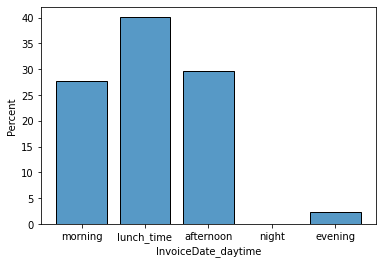

In [35]:
sns.histplot(x='InvoiceDate_daytime', data=df, stat="percent", discrete=True, shrink=.8)

In [36]:
(df['Status_Purchase'].value_counts() / df['Status_Purchase'].count()) * 100

done                    99.531903
cancelled                0.467724
cancelled_and_refund     0.000373
Name: Status_Purchase, dtype: float64

In [37]:
(df['Status_Returns'].value_counts() / df['Status_Returns'].count()) * 100

done        98.027173
returned     1.972827
Name: Status_Returns, dtype: float64

In [38]:
df_Country = df['Country'].value_counts().to_frame()
df_Country['Percentage'] = df['Country'].value_counts().to_frame() / df['Country'].count() * 100
df_Country.rename(columns={'Country': 'Total', 'Percentage': 'Percentage'}, inplace = True)
df_Country.head(10)

,Total,Percentage
United Kingdom,490300,91.364618
Germany,9480,1.766544
France,8541,1.591567
EIRE,8184,1.525042
Spain,2528,0.471078
Netherlands,2371,0.441822
Belgium,2069,0.385546
Switzerland,1994,0.371571
Portugal,1510,0.281380
Australia,1258,0.234421


In [39]:
df_Customer = df['CustomerID'].value_counts().to_frame()
df_Customer['Percentage'] = df['CustomerID'].value_counts().to_frame() / df['CustomerID'].count() * 100
df_Customer.rename(columns={'CustomerID': 'Total', 'Percentage': 'Percentage'}, inplace = True)
df_Customer.head(10)

,Total,Percentage
Anonymous,135037,25.163377
17841,7812,1.455722
14911,5898,1.099059
14096,5128,0.955574
12748,4459,0.830909
14606,2759,0.514124
15311,2478,0.461761
14646,2085,0.388528
13089,1853,0.345296
13263,1667,0.310636


<H3><b>Observations:</b><H3>

<p>1. 'InvoiceDate_year' was unbalanced, specially 2010 that we don't have enough information. It is better to ignore this column till having more.</p>
<p>2. It was clear a plateau level of purchase between January and August. Then it significantly increased the last months.</p>
<p>3. Something to highlight is over the timeday and week. Monday to Friday and at lunchtime the website made the best numbers of purchases.</p>
<p>4. Regarding cancelled or returned purchases, they are a really insignificant amount. So they don't give us valueable information.</p>
<p>5. More than 90% of purchases were made from UK. Then just Germany, France and Ireland between 1%-2%. The rest of them less than 0.5%.</p>
<p>6. 25% of people who made purchases were anonymous. After that just only two customers were over 1%, the rest under this percentage.</p>

In [40]:
df.drop(['InvoiceDate_year', 'Status_Purchase', 'Status_Returns'], axis=1, inplace=True)

---
# <H2><b>Statistics analysis.</H2></b>

In [41]:
def describe(df, stats):
    d = df.describe(exclude = 'object')
    return d.append(df.reindex(d.columns, axis = 1).agg(stats))

describe(df, ['skew', 'median', 'var']).transpose()[['count', 'mean', 'median', 'skew', 'std', 'min', 'max', '25%', '50%', '75%']]

,count,mean,median,skew,std,min,max,25%,50%,75%
0,,,,,,,,,,
Quantity,536641.0,9.620029,3.00,-0.263921,219.130156,-80995.00,80995.0,1.00,3.00,10.00
UnitPrice,536641.0,4.632663,2.08,185.600450,97.233117,-11062.06,38970.0,1.25,2.08,4.13
InvoiceDate_month,536641.0,7.544820,8.00,-0.411240,3.508696,1.00,12.0,5.00,8.00,11.00
InvoiceDate_weekday,536641.0,2.423889,2.00,0.469035,1.839870,0.00,6.0,1.00,2.00,4.00
InvoiceDate_hour,536641.0,13.077154,13.00,0.002851,2.447505,6.00,20.0,11.00,13.00,15.00


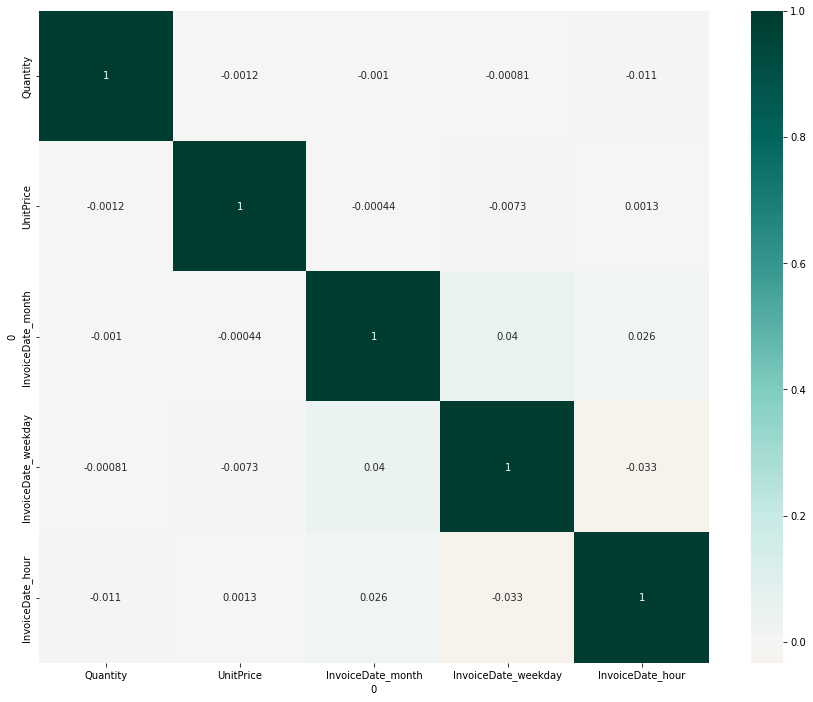

In [42]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, cmap="BrBG", center=0)

<H3><b>Observations:</b><H3>

<p>1. 'Quantity' and 'UnitPrice' have outliers as we can see over mean and median.</p>
<p>2. Heatmap shows any relationship between all data (all columns are independents).</p>

---
# <H2><b>Conclusions</b></H2>

<p>After all the analysis we made, I can conclude we need more data (columns) to make a good model to predict or recommend system because there are not any correlation between them.</p>

<p>To finish, we can say the following:</p>
<p>1. UK represent a 91% of all our customres.</p>
<p>2. Between Monday to Friday there are more than 80% of all purchases. Moreover, the lunchtime is a significant peak around 40%, and then afternoon and morning but under more than 10% with it.</p>
<p>3. 25% of all purchases were made for users who used the web but are not subscribe.</p>